In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 1000)

In [2]:
train = pd.read_csv('../Data/train_data.csv')
test = pd.read_csv('../Data/test_data.csv')

In [3]:
print('The train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The train data has 169307 rows and 43 columns
The test data has 91166 rows and 42 columns


In [4]:
## check target class
train['target'].value_counts(normalize=True)

0    0.583957
2    0.217676
1    0.198367
Name: target, dtype: float64

## Data After previous engg and analysis

In [5]:
#Drop 'cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18' columns
train=train.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18'],1)
test=test.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18'],1)

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scale=MinMaxScaler()
li=[]
for i in train.columns:
    if 'cont' in i:
        li.append(i)
# scaled_train_data=scale.fit_transform(train[li])
# scaled_test_data=scale.fit_transform(test[li])

In [8]:
print(li)

['cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5', 'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18']


In [9]:
plt.figure(figsize=(10,7))

In [10]:
import seaborn as sns

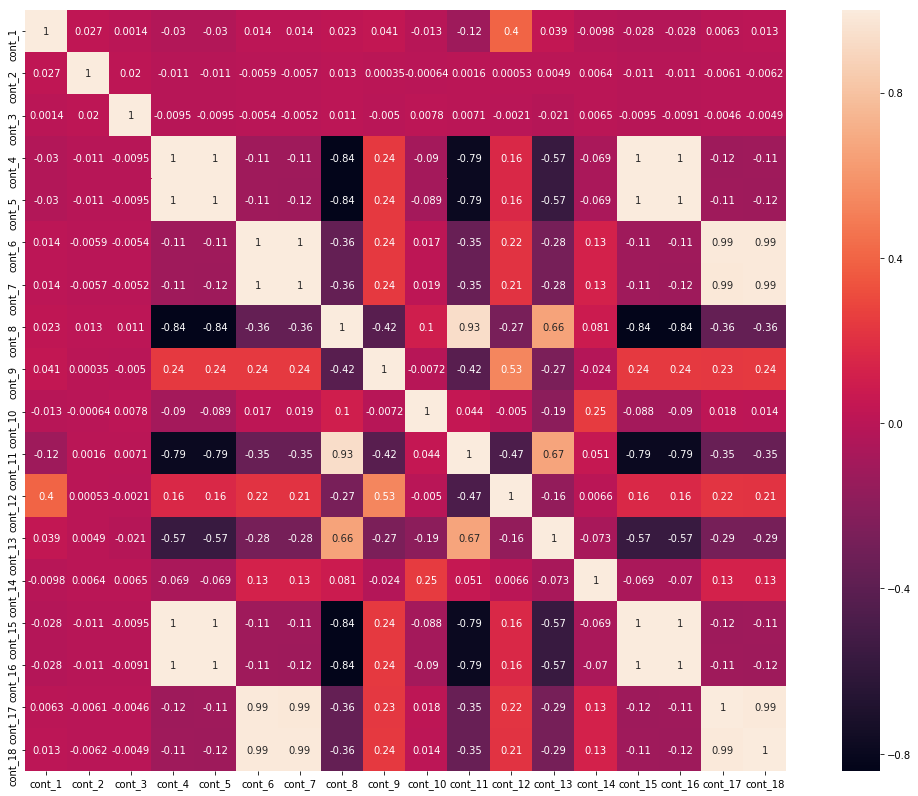

In [11]:
plt.figure(figsize=(20,14))
sns.heatmap(data=train[li].corr(),annot=True, square=True)
plt.show()

In [12]:
train['cont_4_5_max']=[max(i,j) for i,j in zip(train['cont_4'],train['cont_5'])]
train['cont_6_7_min']=[min(i,j) for i,j in zip(train['cont_6'],train['cont_7'])]
train['cont_15_16_min']=[min(i,j) for i,j in zip(train['cont_15'],train['cont_16'])]

test['cont_4_5_max']=[max(i,j) for i,j in zip(test['cont_4'],test['cont_5'])]
test['cont_6_7_min']=[min(i,j) for i,j in zip(test['cont_6'],test['cont_7'])]
test['cont_15_16_min']=[min(i,j) for i,j in zip(test['cont_15'],test['cont_16'])]

In [13]:
#choose min due to high corr
train=train.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)
test=test.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)

In [14]:
train['cont_15_16_min']=train['cont_14']*2 + train['cont_15_16_min']+2*train['cont_1']

In [15]:
test['cont_15_16_min']=test['cont_14']*2 + test['cont_15_16_min']+2*train['cont_1']

In [16]:
li2=[i for i in train.columns if 'cont' in i ]

In [17]:
train['cont_17_18_min']=[min(i,j) for i,j in zip(train['cont_17'],train['cont_18'])]
test['cont_17_18_min']=[min(i,j) for i,j in zip(test['cont_17'],test['cont_18'])]

In [18]:
train=train.drop(['cont_17','cont_18'],1)
test=test.drop(['cont_17','cont_18'],1)

In [19]:
feature_names = [x for x in train.columns if x not in ['connection_id','target']]

In [20]:
import gc
gc.collect()

16812

In [26]:
plt.figure(figsize=(16,19))
sns.heatmap(data=train[feature_names].corr(),)

In [27]:
gc.collect()

285

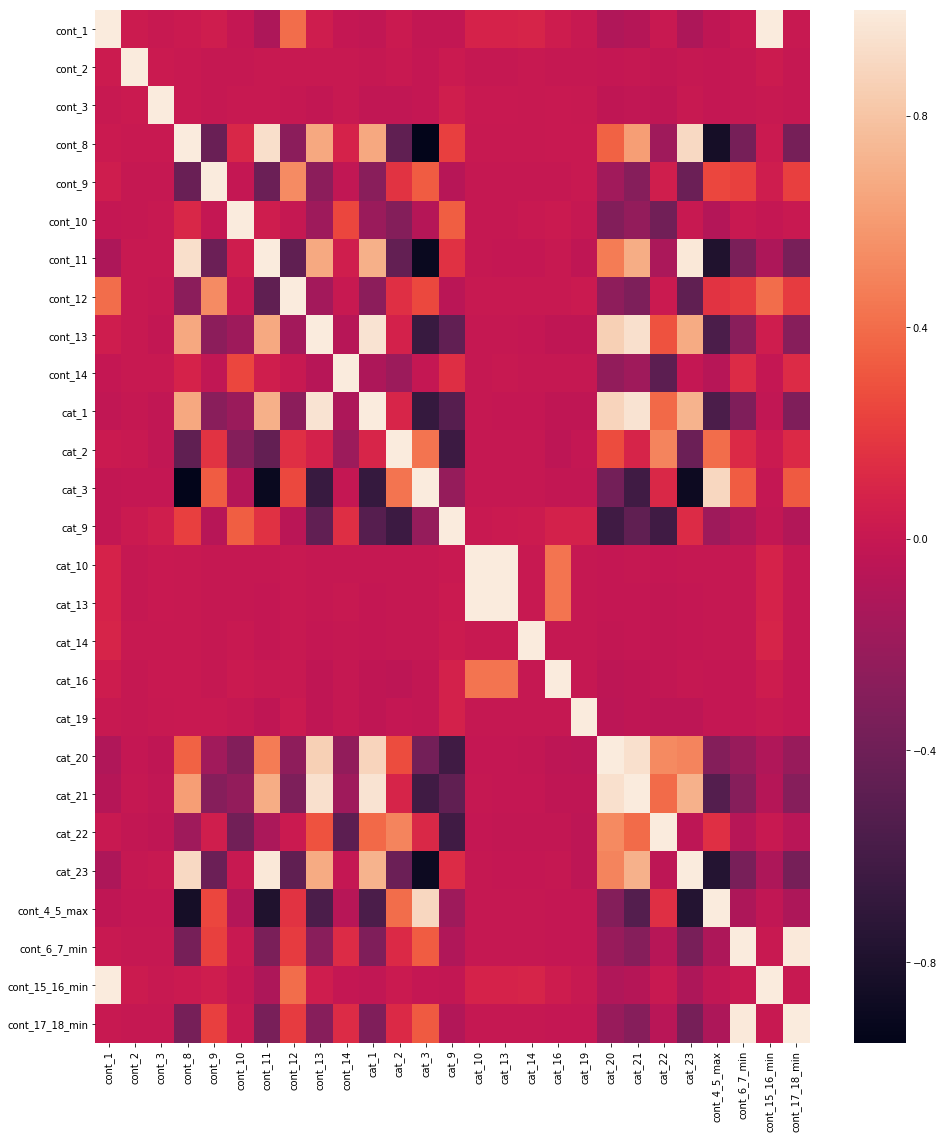

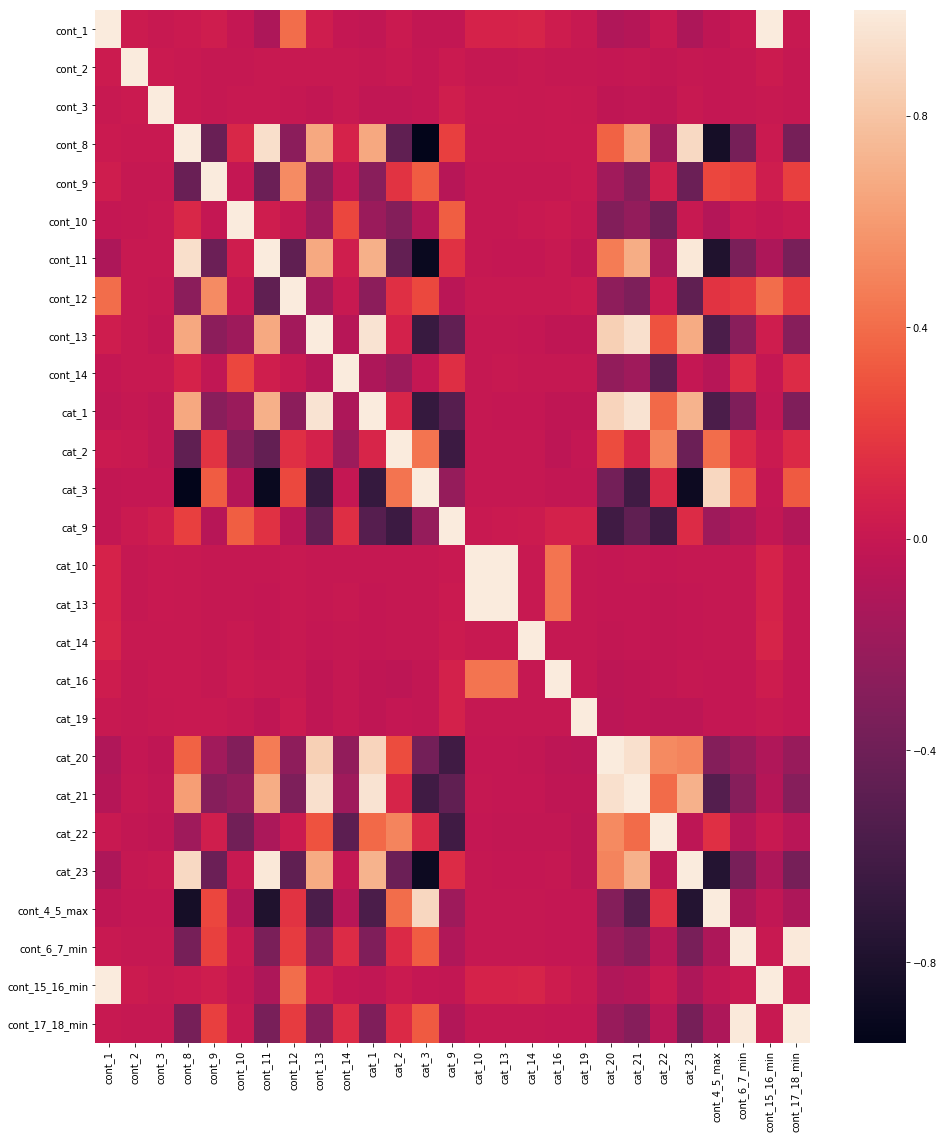

In [28]:
plt.show()

In [45]:
corelationMatrix = train[feature_names].corr()
def plotHeatMap(df, size=(16,9),an=True):
    plt.figure(figsize=size)
    cmap = plt.cm.magma
    sns.heatmap(df.corr(),cmap=cmap,linewidths=0.1,vmax=1, linecolor="white", square=True,annot=an)
    plt.show()

In [39]:
corelationEdit = corelationMatrix[abs(corelationMatrix) > 0.8]

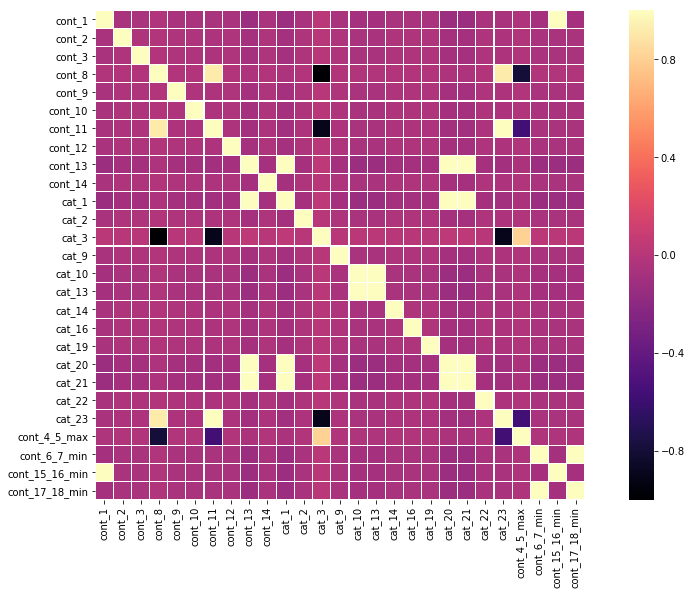

In [46]:
corelationEdit = corelationEdit.replace(np.nan,0)
plotHeatMap(corelationEdit,an=False)

In [53]:
# Max of cat 10 and 13 and drop cat 10 and 13
train['cat_10_13_max'] = [max(i,j) for i,j in zip(train['cat_10'], train['cat_13'])]
test['cat_10_13_max'] = [max(i,j) for i,j in zip(test['cat_10'], test['cat_13'])] 
train = train.drop(['cat_13','cat_10'],1)
test = test.drop(['cat_13','cat_10'],1)

In [121]:
def plot_all_0_8(train):
    corelationMatrix = train.corr()
    corelationEdit = corelationMatrix[abs(corelationMatrix) >= 0.8]
    corelationEdit = corelationEdit.replace(np.nan,0)
    plotHeatMap(corelationEdit,an=False)
    gc.collect()

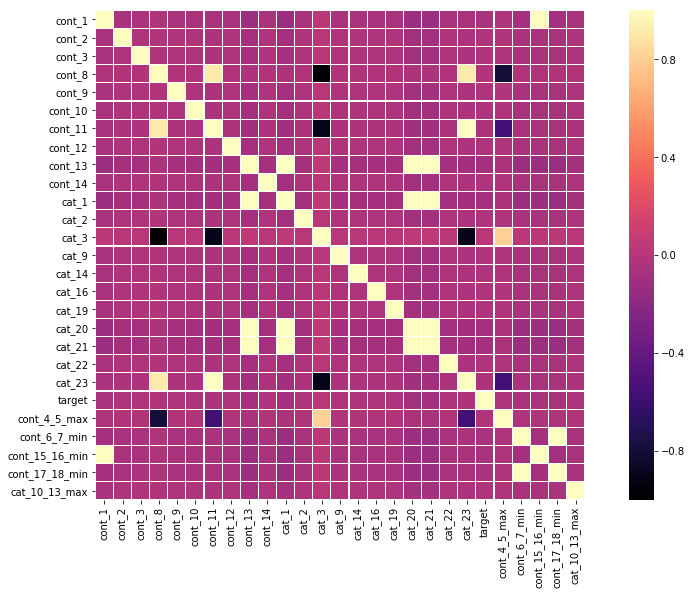

In [55]:
plot_all_0_8(train)

In [62]:
train[['cont_4','cont_5','cont_6','cont_7','cont_15','cont_16']] = pd.read_csv('../Data/train_data.csv')[['cont_4','cont_5','cont_6','cont_7','cont_15','cont_16']]
test[['cont_4','cont_5','cont_6','cont_7','cont_15','cont_16']] = pd.read_csv('../Data/test_data.csv')[['cont_4','cont_5','cont_6','cont_7','cont_15','cont_16']]

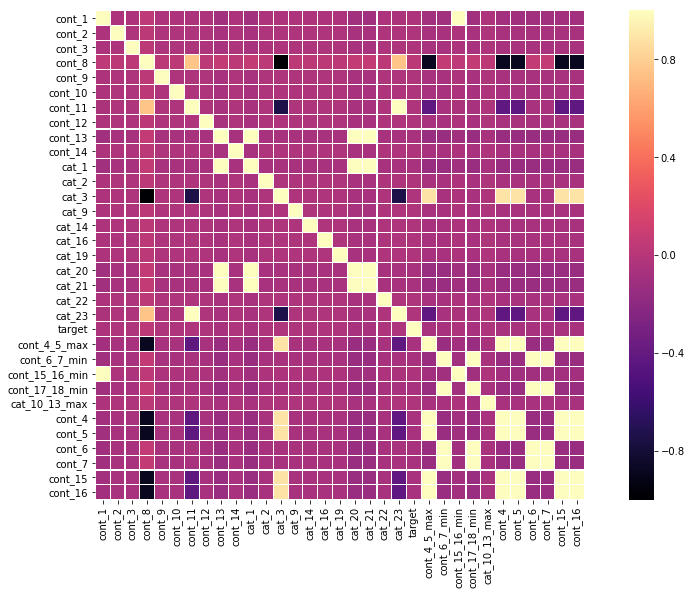

In [65]:
plot_all_0_8(train)

In [78]:
train = train.drop(['cont_4_5_max','cont_6_7_min','cont_15_16_min'],1)
test = test.drop([['cont_4_5_max','cont_6_7_min','cont_15_16_min'],1)
gc.collect()

5017

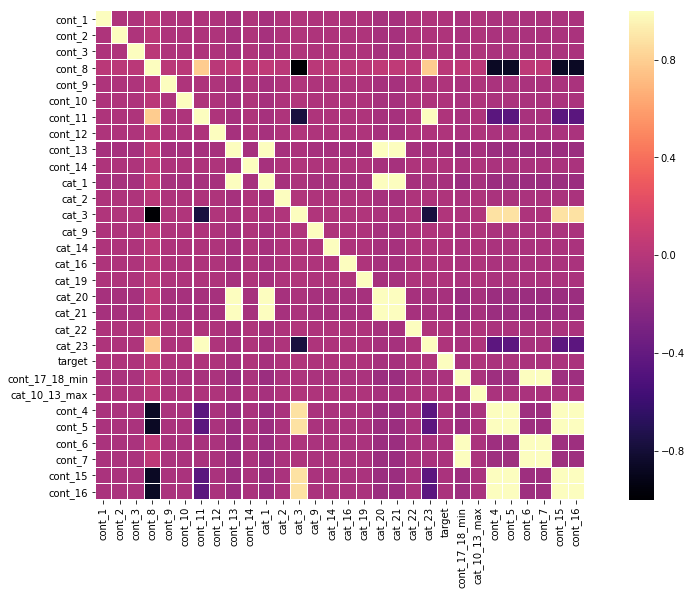

In [79]:
plot_all_0_8(train)

In [81]:
train['cont_6_7_mean'] = [(i+j)/2 for i,j in zip(train['cont_6'],train['cont_7'])]

In [84]:
test['cont_6_7_mean'] = [(i+j)/2 for i,j in zip(test['cont_6'],test['cont_7'])]

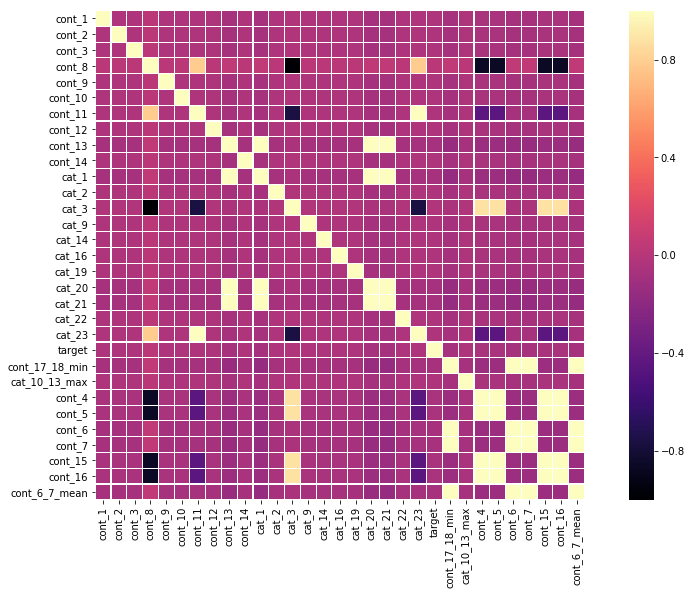

In [85]:
plot_all_0_8(train)

In [89]:
def read_custom(fileName, features):
    return pd.read_csv(fileName)[features]
def collect():
    return gc.collect()
trainPath = '../Data/train_data.csv'
testPath ='../Data/test_data.csv'

In [96]:
train[['cont_17','cont_18']] = read_custom(trainPath,['cont_17','cont_18'])
test[['cont_17','cont_18']] = read_custom(testPath,['cont_17','cont_18'])

In [97]:
collect()

2128

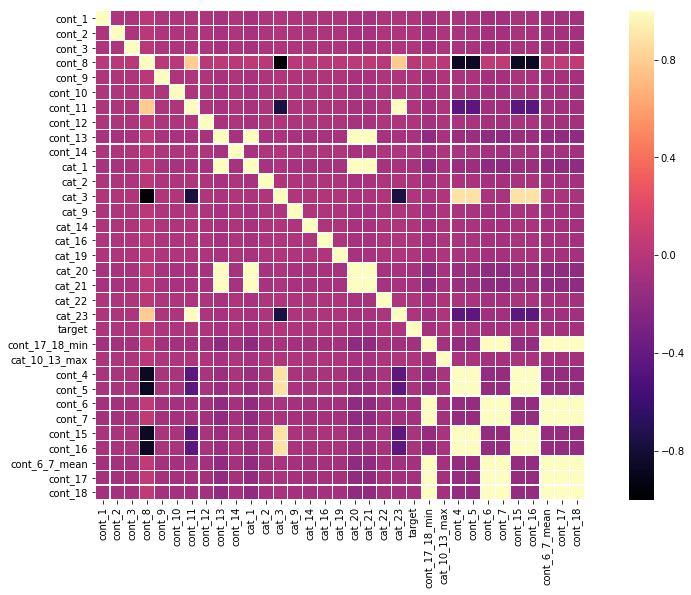

In [98]:
plot_all_0_8(train)

In [99]:
test['cont_17_18_mean'] = [(i+j)/2 for i,j in zip(test['cont_17'],test['cont_18'])]
train['cont_17_18_mean'] = [(i+j)/2 for i,j in zip(train['cont_17'],train['cont_18'])]

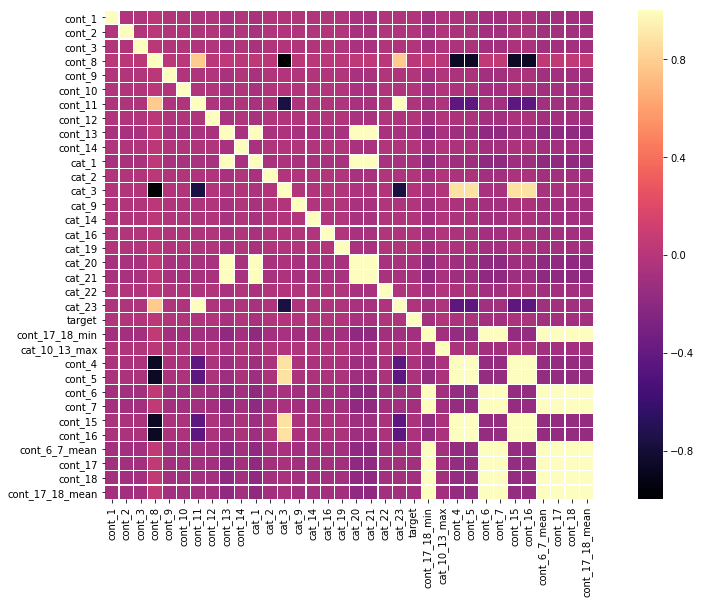

In [100]:
plot_all_0_8(train)

In [102]:
def get_feature_Name(train):
    return [ x for x in train.columns if x not in ['connection_id', 'target']]
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=9, min_samples_leaf=50, max_features=0.2, n_jobs=-1, random_state=2002)
rf.fit(train[get_feature_Name(train)], train['target'])
print("----- Training Done -----")

----- Training Done -----


In [105]:
def horiBar(Name,Importance):
    plt.figure(figsize=(16,9))
    df=aggregate(Name, Importance)
    sns.barplot(df['Importance'],df['Name'])
    plt.show()
def aggregate(X,Y):
    A = [(x,y) for x,y in zip(X,Y)]
    df = pd.DataFrame(A)
    df.columns = ['Name', 'Importance']
    df=df.sort_values(['Importance'])
    df
    return df


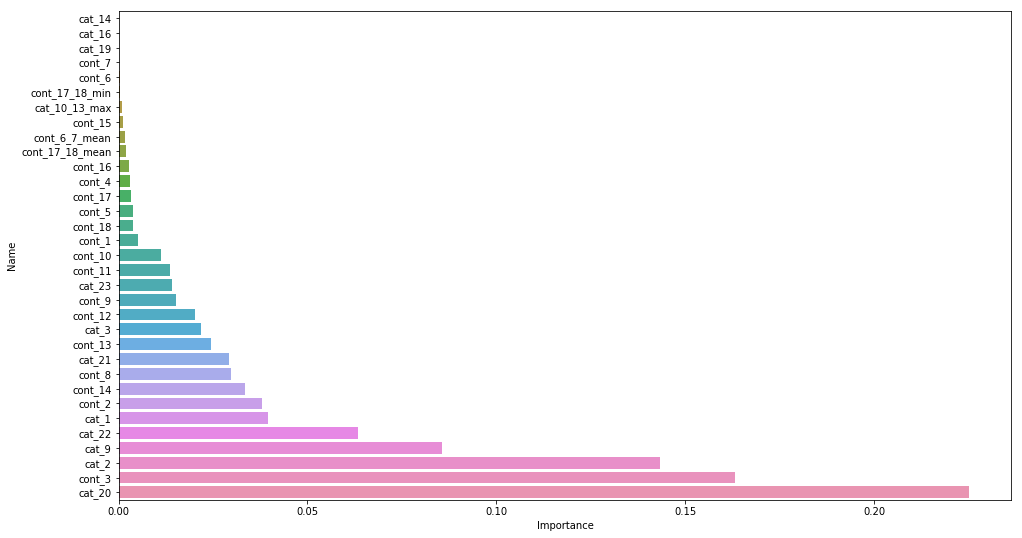

In [106]:
horiBar(get_feature_Name(train),rf.feature_importances_)

In [110]:
train[['cont_18','cont_17_18_mean']].corr()

,cont_18,cont_17_18_mean
cont_18,1.000000,0.996725
cont_17_18_mean,0.996725,1.000000


In [111]:
train['cat_14'].max()

25

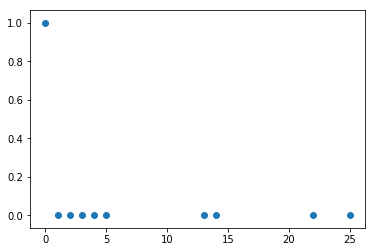

In [120]:
plt.scatter(train["cat_14"].value_counts().index.values,train["cat_14"].value_counts().values/train["cat_14"].value_counts().values.max())
plt.title()
plt.show()

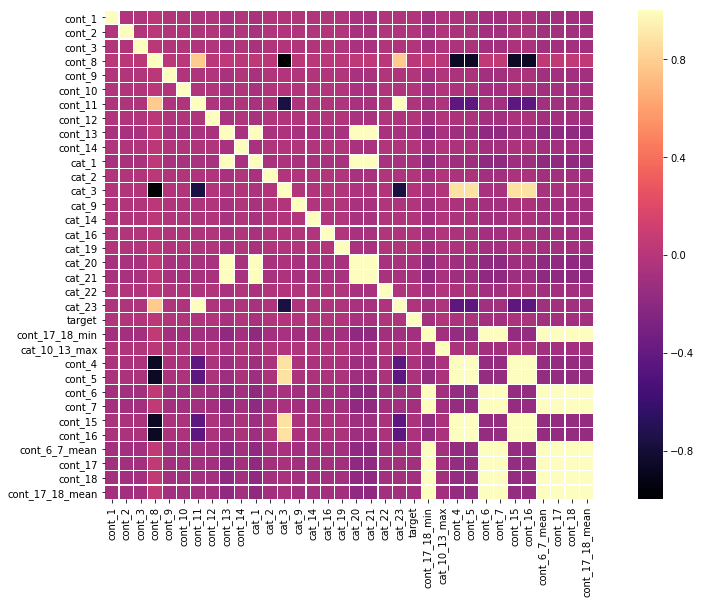

In [122]:
plot_all_0_8(train)

### Now doing PCA for increasing the features

In [123]:
collect()

947

In [124]:
from sklearn.decomposition import PCA

In [131]:
for i, j in zip(train.drop(['target'],1).columns,test.columns):
    if i != j:
        print('error')
        print('(i,j) = (' + i + ' , ' + j + ')' )
    print(i + ' , ' + j)

connection_id , connection_id
cont_1 , cont_1
cont_2 , cont_2
cont_3 , cont_3
cont_8 , cont_8
cont_9 , cont_9
cont_10 , cont_10
cont_11 , cont_11
cont_12 , cont_12
cont_13 , cont_13
cont_14 , cont_14
cat_1 , cat_1
cat_2 , cat_2
cat_3 , cat_3
cat_9 , cat_9
cat_14 , cat_14
cat_16 , cat_16
cat_19 , cat_19
cat_20 , cat_20
cat_21 , cat_21
cat_22 , cat_22
cat_23 , cat_23
cont_17_18_min , cont_17_18_min
cat_10_13_max , cat_10_13_max
cont_4 , cont_4
cont_5 , cont_5
cont_6 , cont_6
cont_7 , cont_7
cont_15 , cont_15
cont_16 , cont_16
cont_6_7_mean , cont_6_7_mean
cont_17 , cont_17
cont_18 , cont_18
cont_17_18_mean , cont_17_18_mean


In [132]:
pca2 = PCA(n_components=2,svd_solver="full",random_state=20540727)
pca4 = PCA(n_components=4,svd_solver="full",random_state=20540727)


In [134]:
pca2.fit(train[get_feature_Name(train)])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=20540727,
  svd_solver='full', tol=0.0, whiten=False)

In [135]:
pca4.fit(train[get_feature_Name(train)])

PCA(copy=True, iterated_power='auto', n_components=4, random_state=20540727,
  svd_solver='full', tol=0.0, whiten=False)

In [136]:
trainPca2 = pca2.transform(train[get_feature_Name(train)])
testPca2 = pca2.transform(train[get_feature_Name(test)])
trainPca4 = pca4.transform(train[get_feature_Name(train)])
testPca4 = pca4.transform(test[get_feature_Name(test)])

In [140]:
trainPca4 = pd.DataFrame(trainPca4)
testPca4 = pd.DataFrame(testPca4)
trainPca4.columns = ['pca4_1','pca4_2','pca4_3','pca4_4']
testPca4.columns = ['pca4_1','pca4_2','pca4_3','pca4_4']


trainPca2 = pd.DataFrame(trainPca2)
trainPca2.columns = ['pca2_1','pca2_2']
testPca2 = pd.DataFrame(testPca2)
testPca2.columns = ['pca2_1','pca2_2']

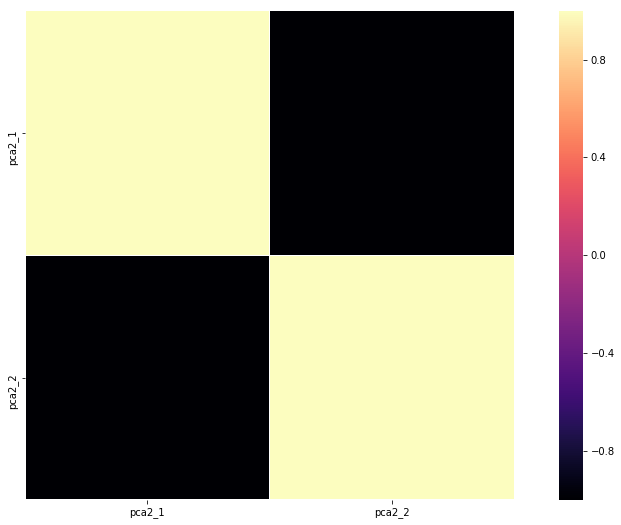

In [142]:
plot_all_0_8(trainPca2)

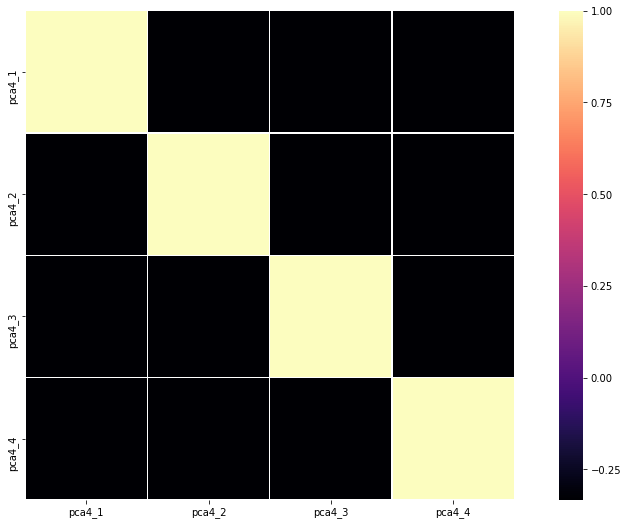

In [144]:
plot_all_0_8(testPca4)

In [150]:
for i in trainPca2.columns:
    train[i] = trainPca2[i]
    test[i] = testPca2[i]
    
for j in trainPca4.columns:
    train[j] = trainPca4[j]
    test[j] = testPca4[j]

In [152]:
for i in trainPca2.columns:
    train = train.drop([i],axis=1)
    test = test.drop([i],axis=1)

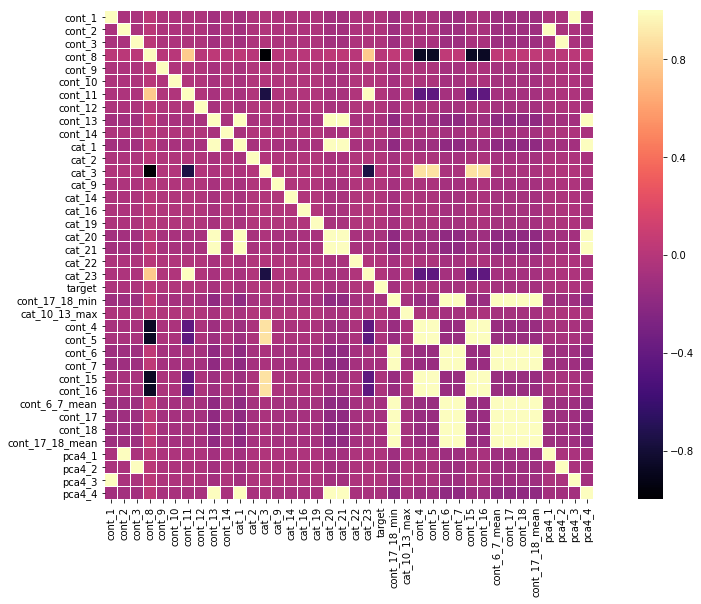

In [153]:
plot_all_0_8(train)

In [154]:
from sklearn.metrics import accuracy_score
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = accuracy_score(label, pred)
    return 'maccuracy', acc

In [155]:
params = {}
params['objective'] = 'multi:softmax'
params['eta'] = 0.02
params['silent'] = True
params['max_depth'] = 6
params['subsample'] = 0.9
params['colsample_bytree'] = 0.9
params['nthread']=-1
params['num_class']=3

In [156]:
# default parameters
params_ = {}
params_['objective'] = 'multi:softmax'
params_['eta'] = 0.2
params_['silent'] = True
params_['max_depth'] = 10
params_['subsample'] = 0.9
params_['colsample_bytree'] = 0.9
params_['nthread']=-1
params_['num_class']=3
params['booster']='gbtree'
params['lambda']=.8
params['min_child_weight']=20
'''
{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}
'''

"\n{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,\n            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,\n            'eval_metric': 'rmse', 'objective': 'reg:linear'}\n"

In [160]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train, X_valid, y_train, y_valid = train_test_split(train[get_feature_Name(train)], train.target, train_size = 0.8, stratify = train.target, random_state = 1996)


/home/ab/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [168]:
dtrain = xgb.DMatrix(data=train[get_feature_Name(train)], label=train.target)
# dtrain = xgb.DMatrix(data=X_train[get_feature_Name(train)], label=y_train)
# dvalid = xgb.DMatrix(data=X_valid[get_feature_Name(train)], label=y_valid)
dtest = xgb.DMatrix(data=test[get_feature_Name(train)])
# watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [171]:
gc.collect()

0

In [170]:
# Accuracy = 780905
# clf1_2 = xgb.train(params, dtrain, 20000, watchlist, maximize=True, verbose_eval=50, early_stopping_rounds=100, feval=multAcc)

In [172]:
clf1_1 = xgb.train(params, dtrain, 350)

In [174]:
sub=pd.read_csv('../Data/test_data.csv')
pred = clf1_1.predict(dtest)
## make submission
sub['target'] = pred
sub['target'] = sub['target'].astype(int)
sub[['connection_id','target']].to_csv('XGB_06_NOV_78.0905_.01.csv', index=False)

In [175]:
print('Done')

Done


In [201]:
train.to_csv('NEWDATAPCA12/train.csv',index=False)
test.to_csv('NEWDATAPCA12/test.csv',index=False)

In [202]:
import pickle
pickle.dump(clf1_1,open('NEWDATAPCA12/xgb78128.dat','+wb'))

In [203]:
collect()

180

In [225]:
pca4 = PCA(n_components=12,svd_solver="full",random_state=20540727)

In [226]:
pca4.fit(train[get_feature_Name(train)])

PCA(copy=True, iterated_power='auto', n_components=12, random_state=20540727,
  svd_solver='full', tol=0.0, whiten=False)

In [227]:
trainPca4 = pca4.transform(train[get_feature_Name(train)])
testPca4 = pca4.transform(test[get_feature_Name(test)])
name = []
for i in range(4):
    name.append('pca_04_' + str(i))

In [228]:
name

['pca_04_0', 'pca_04_1', 'pca_04_2', 'pca_04_3']

In [230]:
trainPca4 = pd.DataFrame(trainPca4)
testPca4 = pd.DataFrame(testPca4)

trainPca4.columns = ['pca_04_0', 'pca_04_1', 'pca_04_2', 'pca_04_3']
testPca4.columns = ['pca_04_0', 'pca_04_1', 'pca_04_2', 'pca_04_3']

ValueError: Length mismatch: Expected axis has 12 elements, new values have 4 elements

In [214]:
for j in trainPca12.columns:
    train[j] = trainPca12[j]
    test[j] = testPca12[j]

In [215]:
X_train, X_valid, y_train, y_valid = train_test_split(train[get_feature_Name(train)], train.target, train_size = 0.8, stratify = train.target, random_state = 1996)

/home/ab/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [216]:
dtrain = xgb.DMatrix(data=train[get_feature_Name(train)], label=train.target)
# dtrain = xgb.DMatrix(data=X_train[get_feature_Name(train)], label=y_train)
# dvalid = xgb.DMatrix(data=X_valid[get_feature_Name(train)], label=y_valid)
dtest = xgb.DMatrix(data=test[get_feature_Name(train)])
# watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [217]:
clf1_12 = xgb.train(params, dtrain, 350)

In [219]:
sub=pd.read_csv('../Data/test_data.csv')
pred = clf1_12.predict(dtest)
## make submission
sub['target'] = pred
sub['target'] = sub['target'].astype(int)
sub[['connection_id','target']].to_csv('XGB_06_NOV_78.0905_01_3rd_012pca.csv', index=False)

In [220]:
print('Done')

Done


In [ ]:
train.to_csv('NEWDATAPCA12/train.csv',index=False)
test.to_csv('NEWDATAPCA12/test.csv',index=False)

In [ ]:
pickle.dump(clf1_1,open('NEWDATAPCA12/xgb.dat','+wb'))

In [ ]:
dtrain = xgb.DMatrix(data=train,)